In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import math

## Загрузка изображения, преобразование в матрицу

In [2]:
def load_image(file_path: str) -> list[list[int]]:
    '''
    Загрузка изображения, преобразование в матрицу
    '''
    image = Image.open(file_path)
    image = image.convert('L')
    pixels = image.load()
    width, height = image.size
    matrix = [[0 for _ in range(width)] for _ in range(height)]
    for j in range(height):
        for i in range(width):
            if pixels[i, j] < 128:
                matrix[j][i] = 1
    return matrix

 ## Получение матриц, соответствующих изображениям

In [3]:
def get_images(path) -> list[list[list[int]]]:
    '''
    Получение матриц, соответствующих изображениям
    '''
    images = []
    for i in range(10):
        file_path = f'{path + str(i)}.bmp'
        images.append(load_image(file_path))
    return images

## Класс для представления нейрона

In [4]:
class Neuron:
    '''
    Класс для представления нейрона
    '''
    def __init__(self, weights):
        self.weights = weights

    def feedforward(self, input):
        output = sum([input[i] * self.weights[i] for i in range(len(input))])
        return output
    
    @staticmethod
    def linear(x):
        return x
    
    @staticmethod
    def relu(x):
        return max(0, x)
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))
    
    @staticmethod
    def tanh(x):
        return (math.exp(x) - math.exp(-x)) / \
            (math.exp(x) + math.exp(-x))
    
    def activation_func_derivative(self, x):
        delta = 0.001
        return (self.activate(x + delta) - self.activate(x)) / delta
    
    def activate(self, x):
        # return self.linear(x)
        return self.relu(x)
        # return self.sigmoid(x)
        return self.tanh(x)

## Класс для представления однослойного перцептрона

In [5]:
class OneLayerPerceptron:
    '''
    Класс для представления однослойного перцептрона
    '''
    def __init__(self, *neurons):
        self.neurons = neurons

    def feedforward(self, input):
        outputs = []
        for neuron in self.neurons:
            output = neuron.activate(neuron.feedforward(input))
            outputs.append(output)
        return outputs
    
    @staticmethod
    def find_mean_squared_error(true, outputs) -> float:
        return 1 / len(true) * sum((true[i] - outputs[i]) ** 2 for i in range(len(true)))
    
    def train(self, epochs, learning_rate, data, trues):
        epochs_x = []
        mses = [[] for _ in range(len(self.neurons))]
        mean_mse = []
        for epoch in range(epochs):
            digit_index = 0
            for input, true in zip(data, trues):
                outputs = self.feedforward(input)
                mse = self.find_mean_squared_error(true, outputs)
                if epoch % 10:
                    mses[digit_index].append(mse)
                for i, output in enumerate(outputs):
                    # частные производные по весам
                    # L = error 
                    # d_L_d_wj = d_L_d_output * d_output_d_wj
                    d_L_d_output = -2 * (true[i] - output)
                    # output = sigmoid(x1 * wi_1 + ... + x20 * wi_20)
                    for j in range(len(self.neurons[i].weights)):
                        d_output_d_wj = input[j] * \
                            self.neurons[i].activation_func_derivative(self.neurons[i].feedforward(input))
                        d_L_d_wj = d_L_d_output * d_output_d_wj
                        self.neurons[i].weights[j] -= learning_rate * d_L_d_wj
                digit_index += 1
            if epoch % 10:
                epochs_x.append(epoch)
                mean_mse.append(sum(mses[i][-1] for i in range(len(self.neurons))) / len(self.neurons))
        for i in range(len(self.neurons) + 1):
            fig, ax = plt.subplots(nrows=1, ncols=1)
            fig.suptitle('Dependency of the MSE on learning epoch')
            if i != len(self.neurons):
                ax.set_title(f'Digit: {i}')
            ax.set_xlabel('Epoch')
            ax.set_ylabel('MSE')
            if i != len(self.neurons):
                ax.plot(epochs_x, mses[i], color='red')
            else:
                ax.plot(epochs_x, mean_mse, color='red')

    def predict(self, data):
        flatten_data = [j for elem in data for j in elem]
        outputs = self.feedforward(flatten_data)
        print(f'Результат обучения: {outputs}')
        print(f'Предсказанная цифра: {str(outputs.index(max(outputs)))}')

## Тестирование

Результат обучения: [0.9999999998967005, 0, 0, 0, 1.457167719820518e-16, 0, 0, 0, 0.0023412868680938725, 0]
Предсказанная цифра: 0
Результат обучения: [0, 0.9999999999999997, 8.326672684688674e-17, 0, 1.734723475976807e-16, 0, 0, 0, 0, 2.579334201779915e-07]
Предсказанная цифра: 1
Результат обучения: [0, 1.1102230246251565e-16, 0.9999999999999993, 6.938893903907228e-16, 0, 0, 0, 0, 0.002208287688268973, 0]
Предсказанная цифра: 2
Результат обучения: [0, 0, 0, 0.9999999999999996, 0, 1.8016144132104728e-13, 0, 6.38378239159465e-16, 0, 3.004444257548311e-07]
Предсказанная цифра: 3
Результат обучения: [0, 1.6653345369377348e-16, 0, 0, 0.9999999999999999, 0, 3.967868382304118e-06, 0, 0.0006886883307098968, 0]
Предсказанная цифра: 4
Результат обучения: [0, 0, 0, 3.0531133177191805e-16, 0, 0.9999999999995488, 1.0356617789149258e-05, 0, 0, 2.4436031443031414e-06]
Предсказанная цифра: 5
Результат обучения: [0, 0, 0, 0, 0, 2.220446049250313e-13, 0.9999694724454465, 0, 0.005177318040811452, 0]
Пре

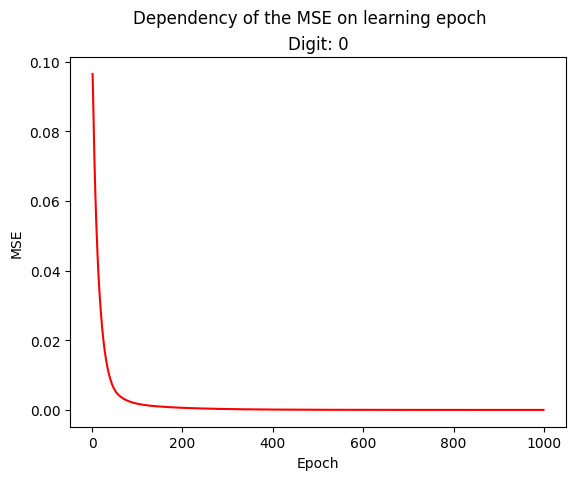

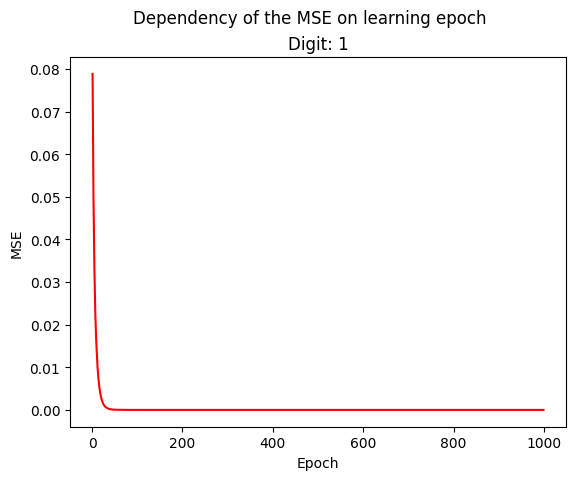

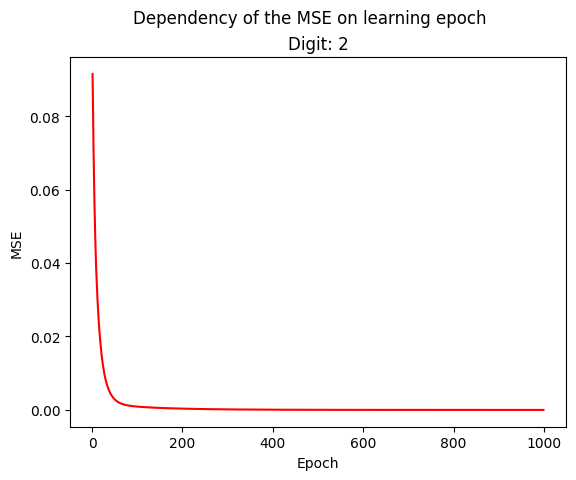

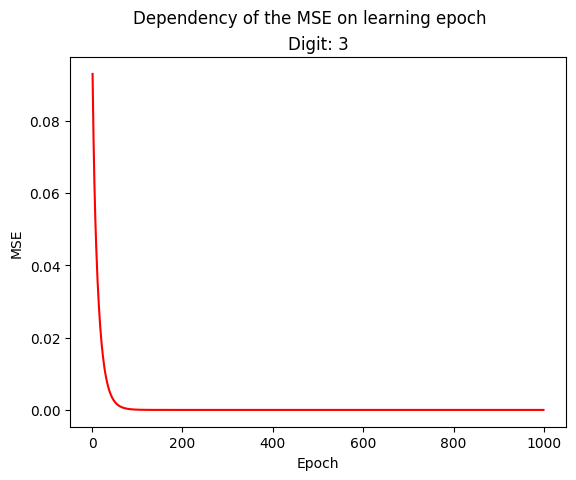

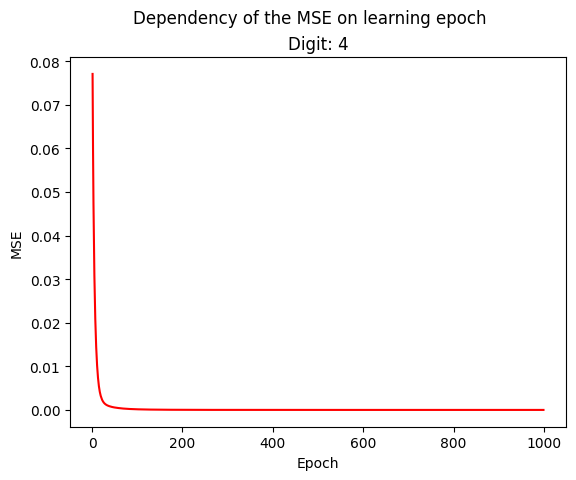

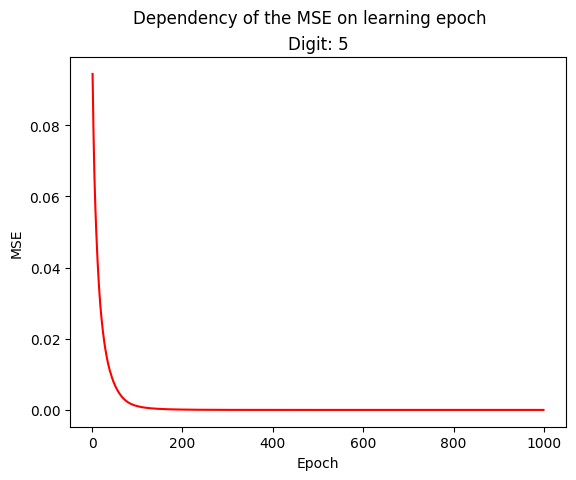

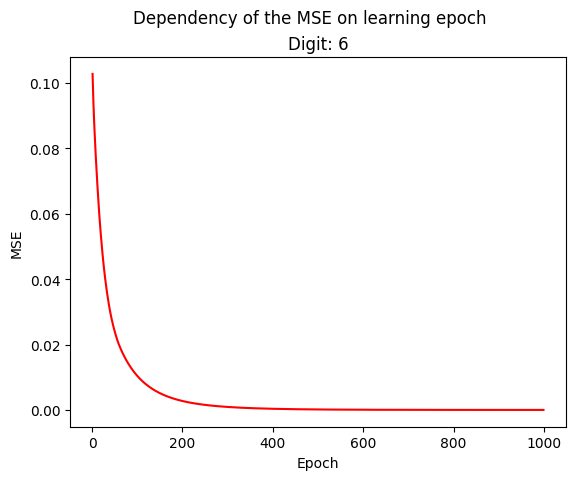

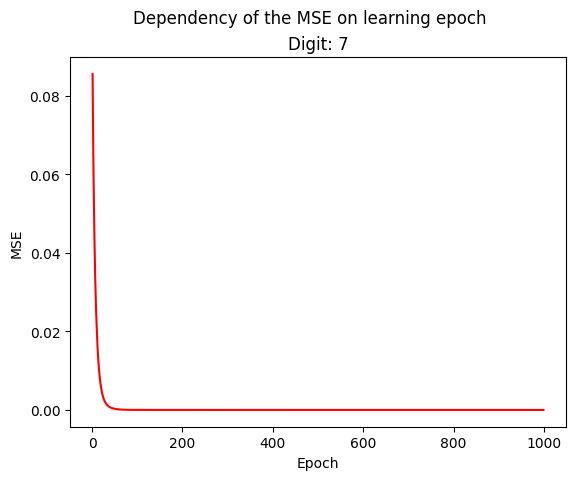

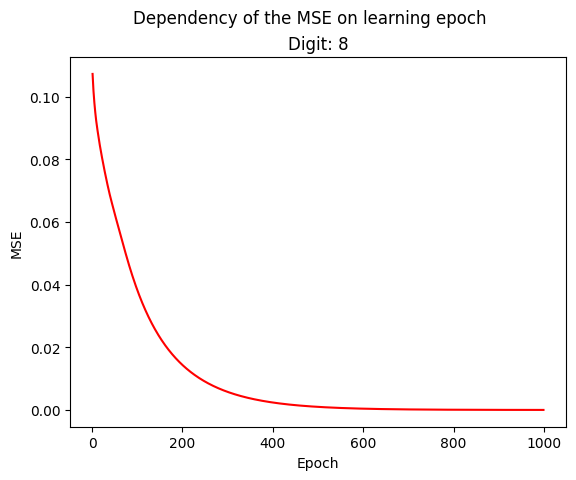

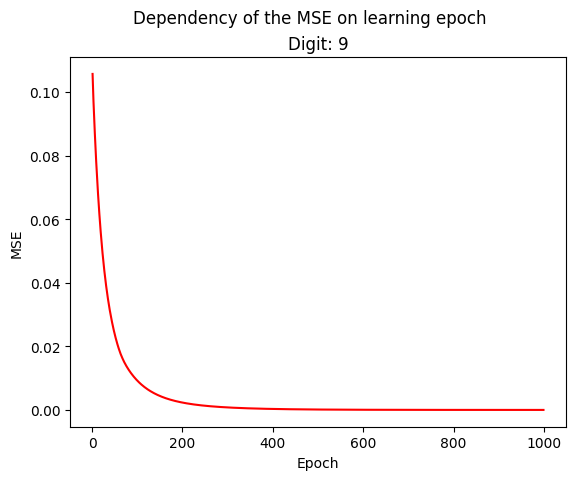

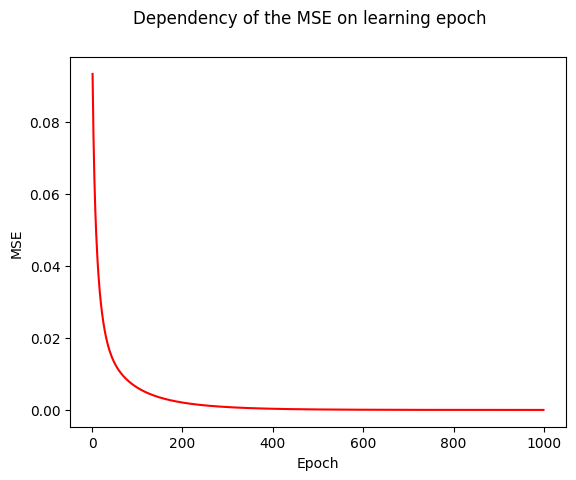

In [6]:
if __name__ == "__main__":
    weights = [0 for _ in range(20)]

    perceptron = OneLayerPerceptron(*[Neuron(weights.copy()) for _ in range(10)])

    flatten_data = []
    images = get_images('./training_data/')
    for image in images:
        flatten_data.append([j for row in image for j in row])

    trues = [[1 if i == j else 0 for j in range(10)] for i in range(10)]
    perceptron.train(1000, 0.01, flatten_data, trues)

    for i in range(len(images)):
        #print(f'Матричное представление изображения:')
        #for row in images[i]:
        #    print(row)
        perceptron.predict(load_image(f"./training_data/{str(i)}.bmp"))

    plt.show()